In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/progetto-data-intensive-applications/bank-full.csv
/kaggle/input/progetto-data-intensive-applications/data_banknote_authentication.csv
/kaggle/input/progetto-data-intensive-applications/on_energy_efficiency.csv
/kaggle/input/progetto-data-intensive-applications/small_susy.csv
/kaggle/input/progetto-data-intensive-applications/bank-additional-full.csv


# 1. DATA DESCRIPTION
<br />

**Bank Client Data**
1.  age (numeric)
2.  job : type of job
3.  marital : marital status 
4.  education
5.  default: has credit in default?
6.  housing: has housing loan? 
7.  loan: has personal loan? 
<br />
**Related to last contact of current campaign**
<br /> 
1.  contact: contact communication type (categorical: 'cellular','telephone')
2.  month: last contact month of year 
3. day_of_week: last contact day of the week
4. duration: last contact duration, in seconds 
<br />
**Other attributes**
<br />
1. campaign: number of contacts performed during this campaign and for this client
2. pdays: number of days that passed by after the client was last contacted from a previous campaign 
3. previous: number of contacts performed before this campaign and for this client
4. poutcome: outcome of the previous marketing campaign
<br />
**social and economic context attributes**
<br />
1.  emp.var.rate: employment variation rate - quarterly indicator 
2.  cons.price.idx: consumer price index - monthly indicator 
3.  cons.conf.idx: consumer confidence index - monthly indicator
4.  euribor3m: euribor 3 month rate - daily indicator
5.  nr.employed: number of employees 
<br />
**Output Variable**
<br />
1.  y - has the client subscribed a term deposit? (binary: 'yes','no')

# 2. IMPORTING LIBRARIES

In [2]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline



# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split


#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#import required modules
from pandas_profiling import ProfileReport
import missingno as msno

#Pre-Processing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline

#Sklearn Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Sklearn Model Selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from scipy import stats

import math
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [3]:
#Set Seaborn Theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")
#Setting to display Pipeline
from sklearn import set_config
set_config(display="diagram")
sns.set(rc={'figure.figsize':(15,8)})

# 3. LOADING THE DATASET

In [4]:
df = pd.read_csv("/kaggle/input/progetto-data-intensive-applications/bank-additional-full.csv",sep=";")
print("Data loaded successfully.")

Data loaded successfully.


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
#check for duplicates and drop them 
print(df.duplicated().sum())

12


In [11]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
print(df.duplicated().sum())

0


# 4. MISSING VALUES

In [13]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# 5. EXPLORATORY DATA ANALYSIS

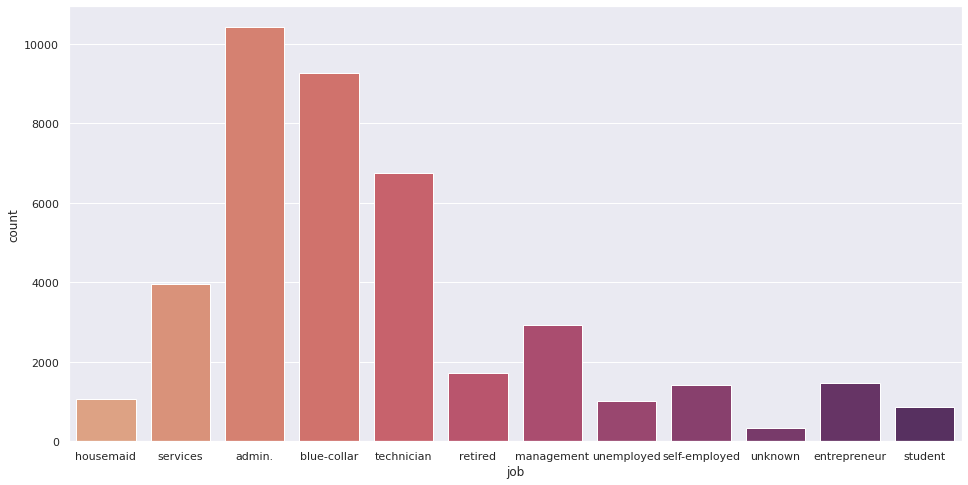

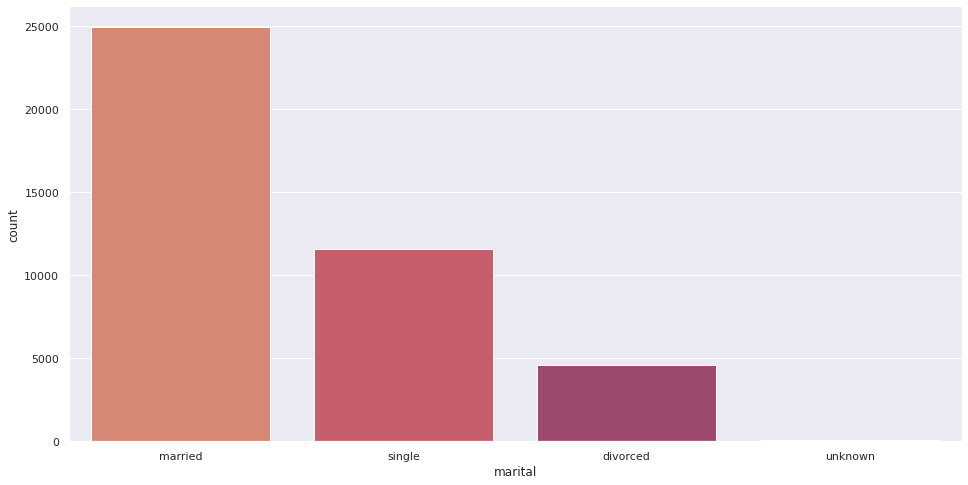

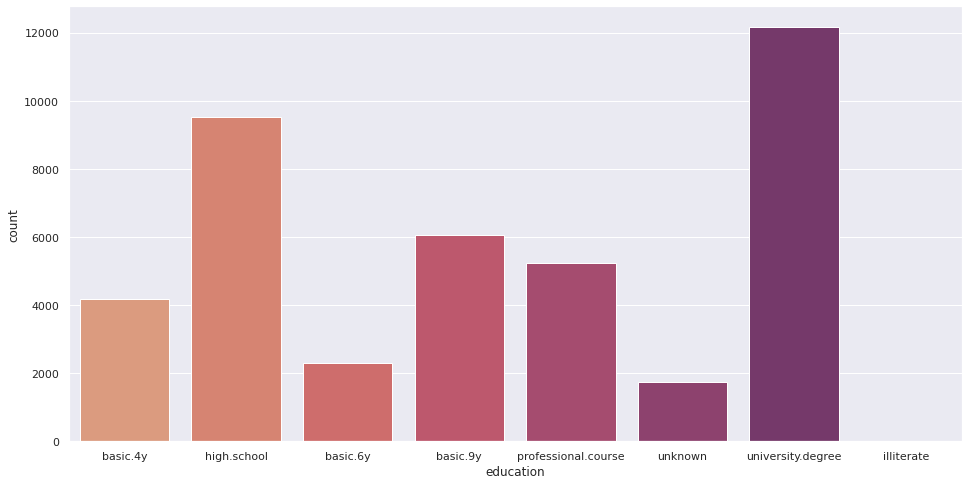

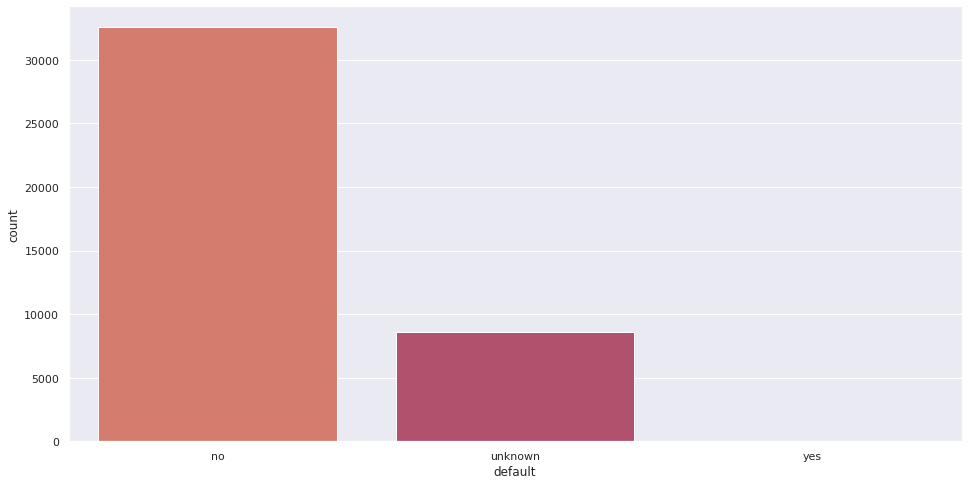

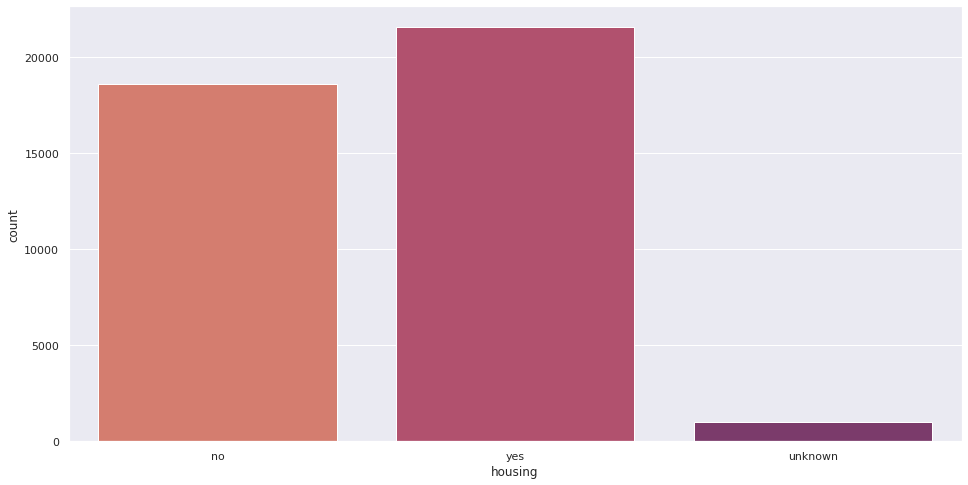

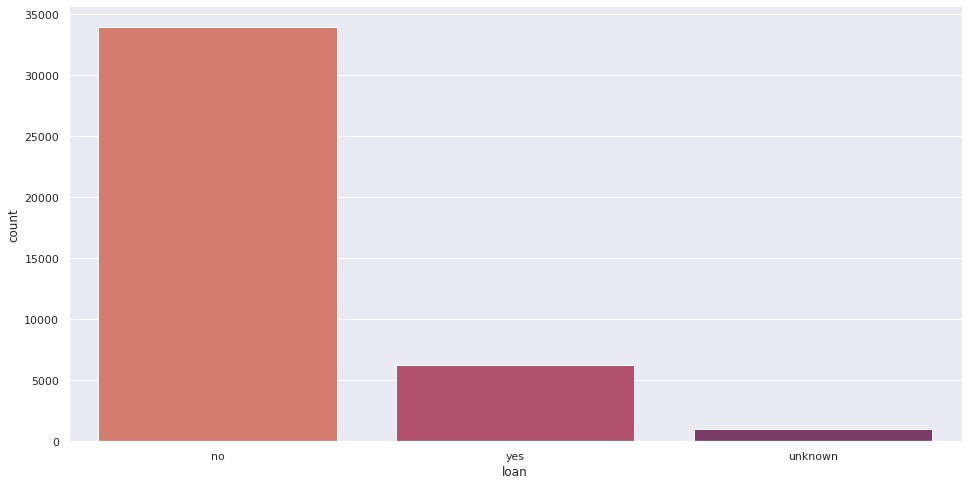

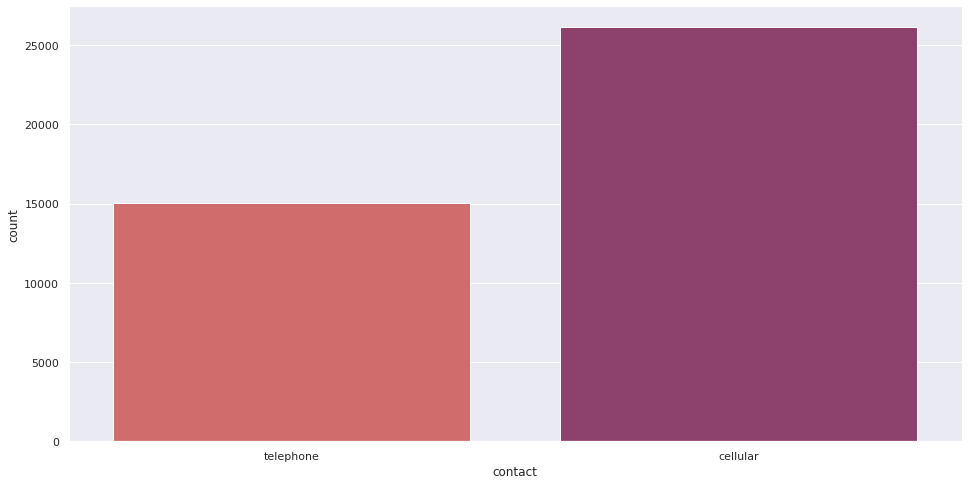

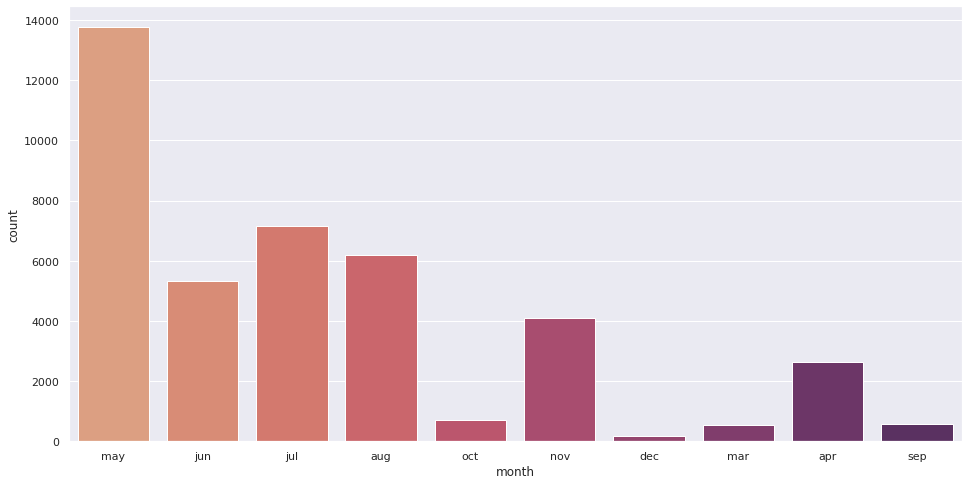

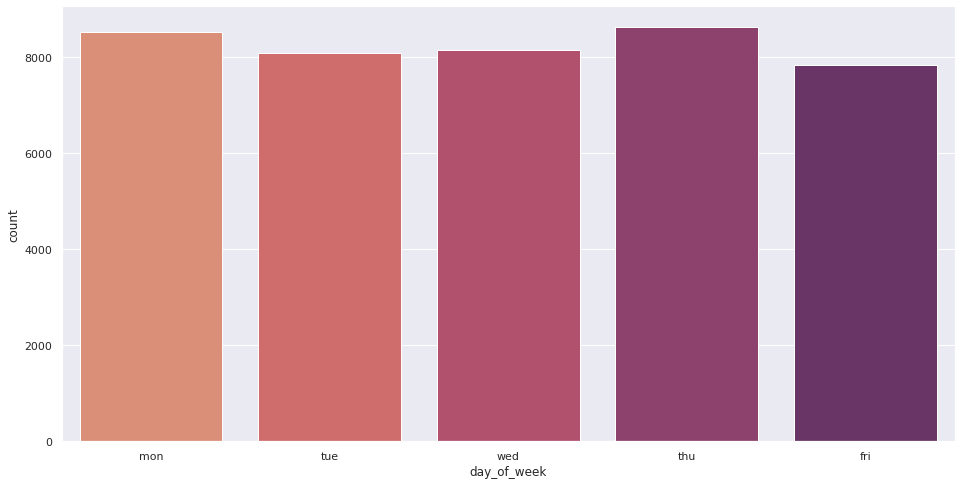

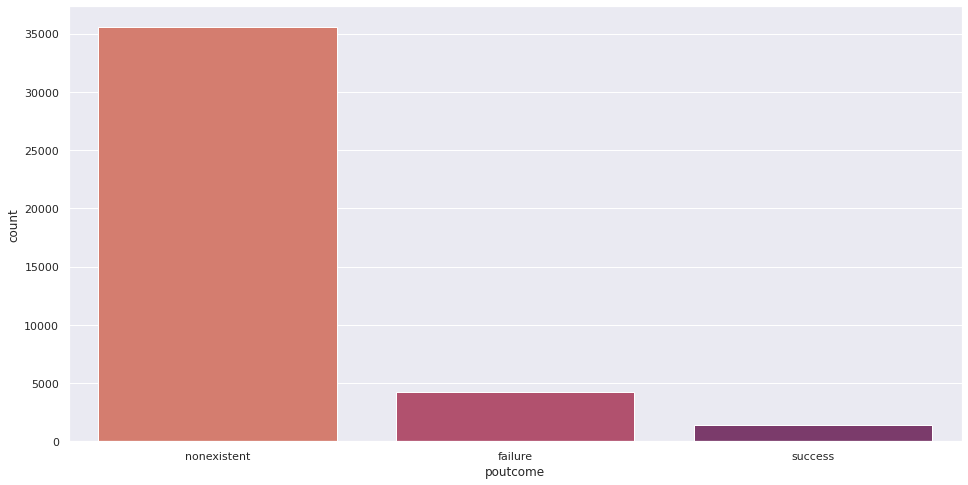

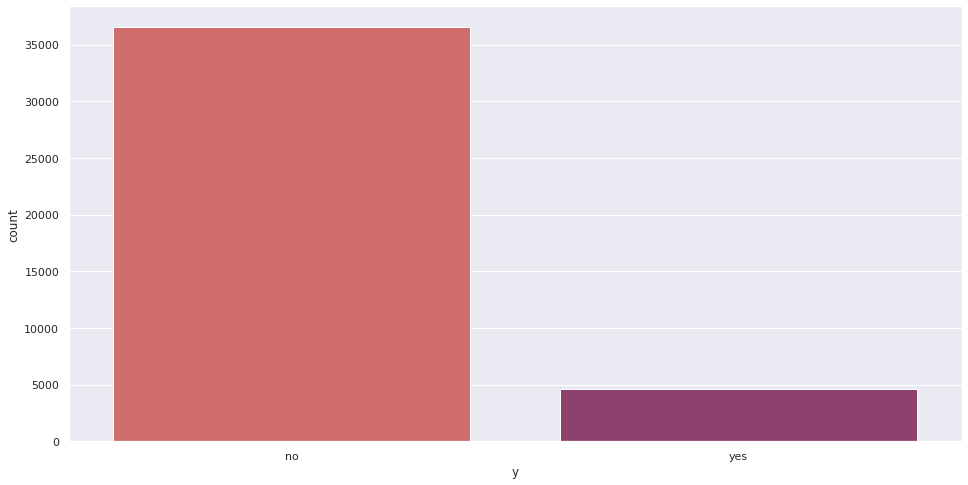

In [15]:
#categiorical variables plotted

for col in df:
    if df[col].dtype == pd.CategoricalDtype:
        plt.figure(figsize=(16,8))
        sns.countplot(x=col,
                      data=df,
                      palette='flare')

plt.show()

In [16]:
df['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

*only 11.2% of the customers successfully subscribed to a term deposit*

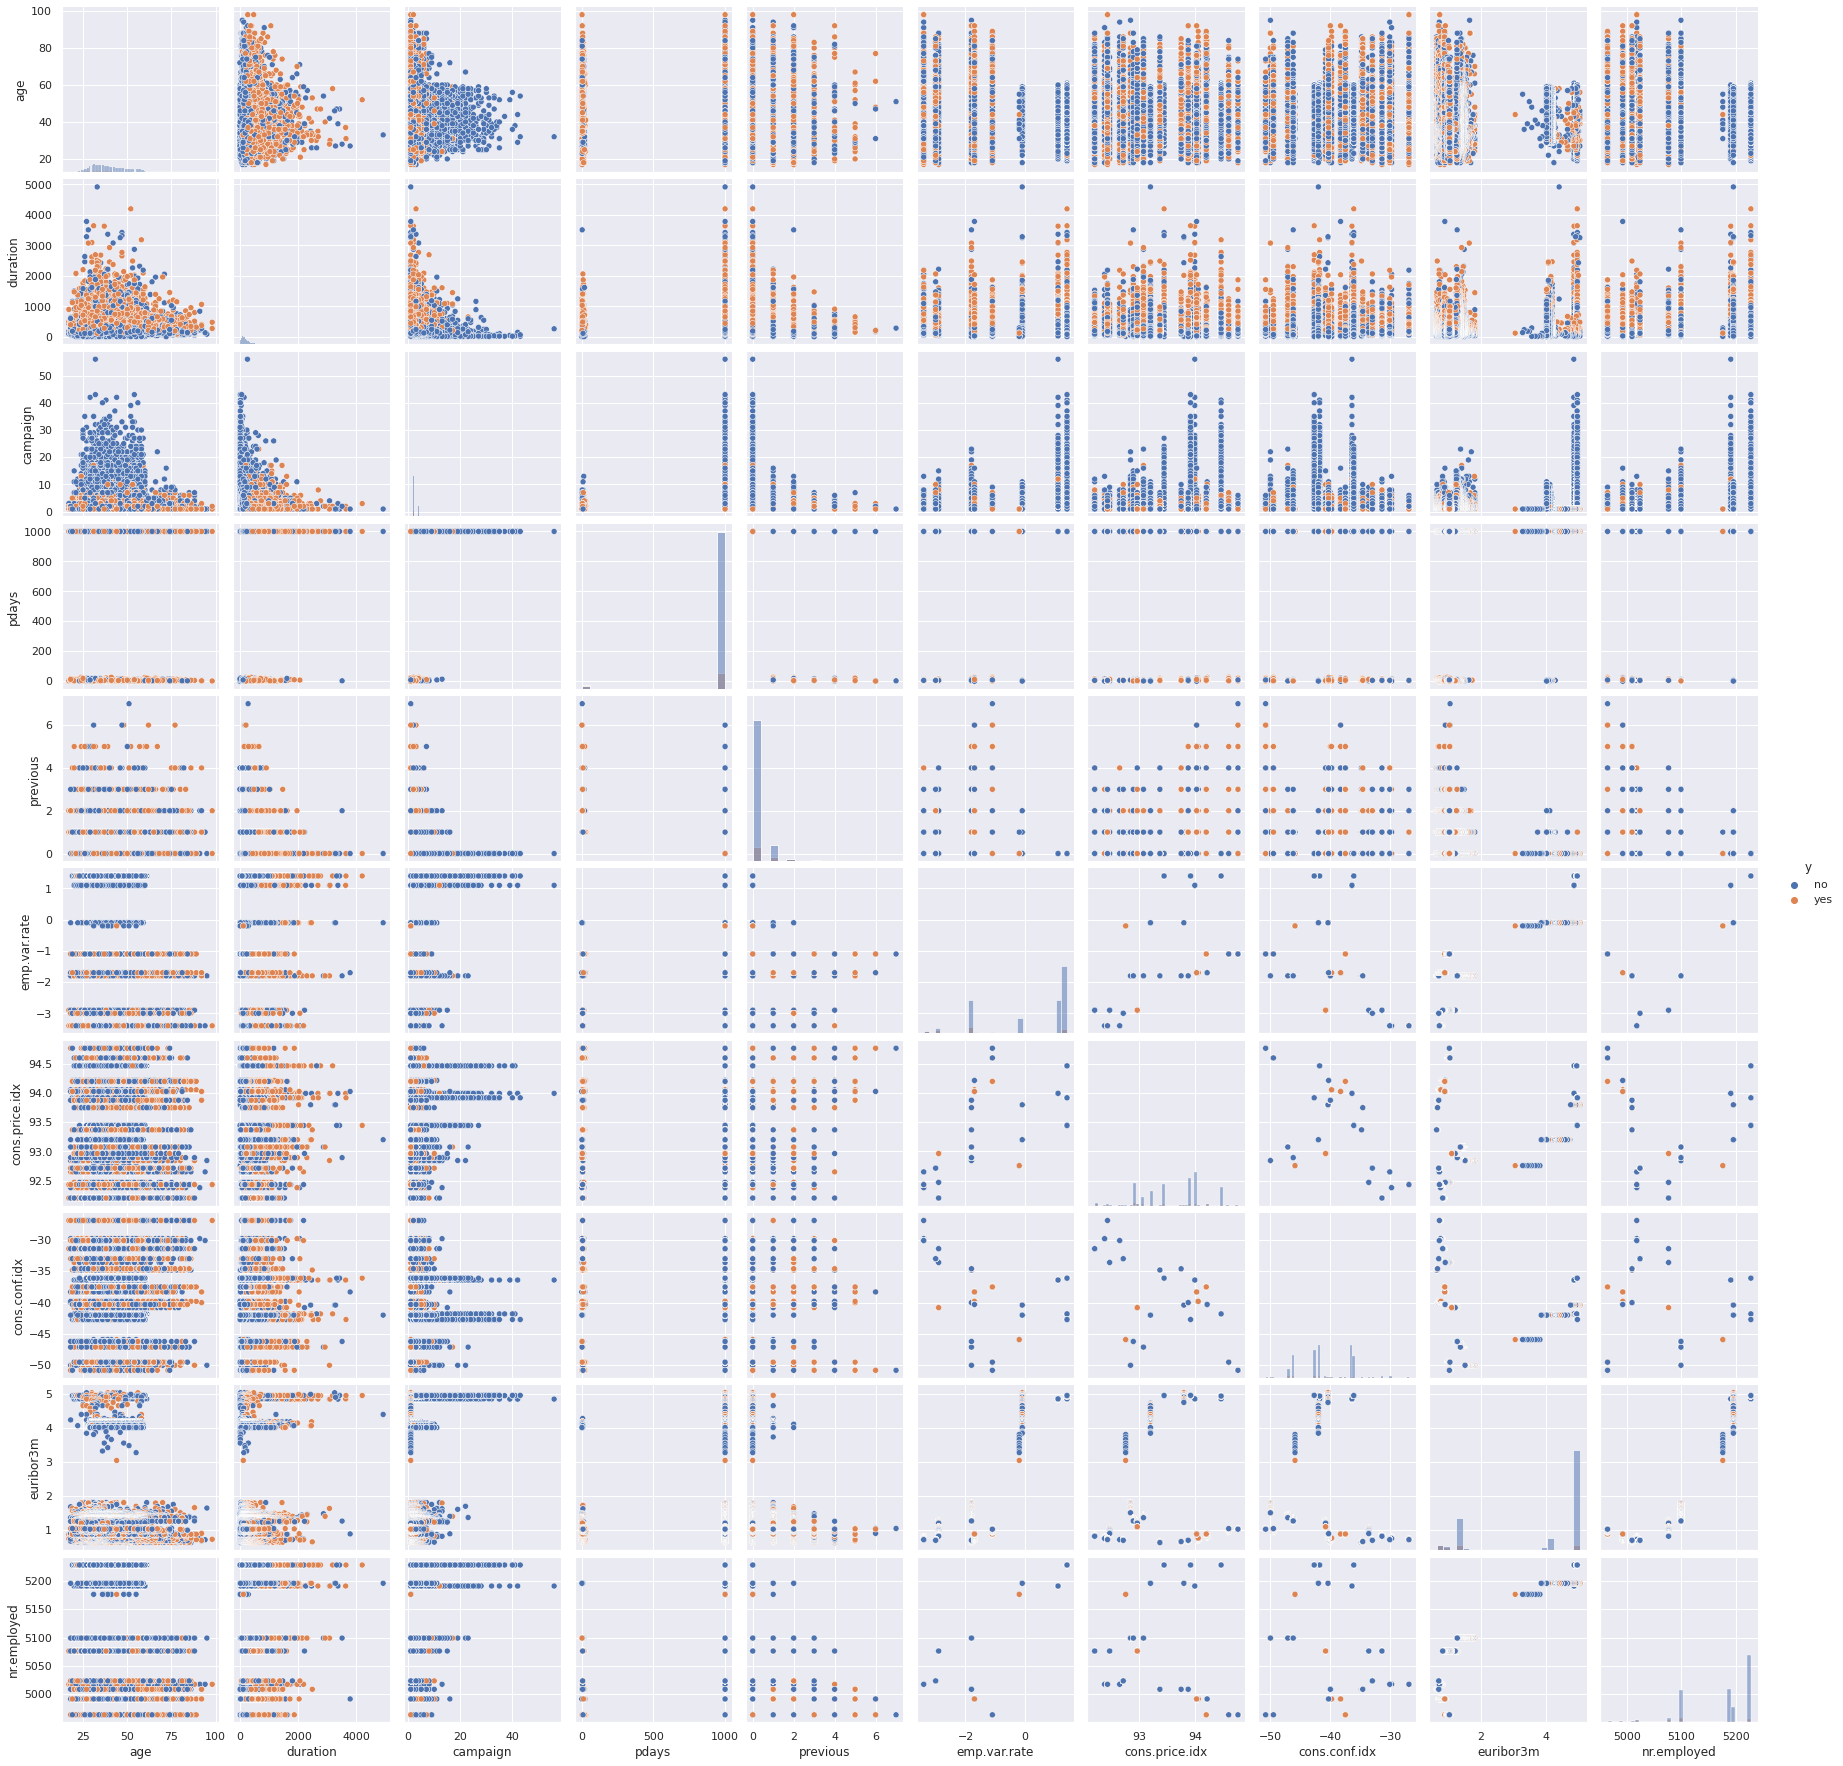

In [17]:
#Numerical variables plotted

sns.pairplot(df, hue="y", diag_kind="hist")

In [18]:
#removing variables with unknown 
df = df[df.contact != 'unknown'] 
df = df[df.job != 'unknown'] 
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']
df = df[df.default != 'unknown']
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.month != 'unknown']
df = df[df.day_of_week != 'unknown']

# 6. DATA PREPROCESSING TIMELINE

In [19]:
#create train test split
#Split the train and test data
train, test =  train_test_split(df,test_size=0.2, random_state=123, stratify=df['y'])
print(train.shape)
print(test.shape)

(24382, 21)
(6096, 21)


In [20]:
#custom preprocessing transformers
#Get the list of Numerical columns for scaling
numCols = ['age',
           'duration',
           'campaign',
           'pdays',
           'previous',
           'emp.var.rate',
           'cons.price.idx',
           'cons.conf.idx',
           'euribor3m',
           'nr.employed']

#Get the list of categorical columns for dummy encoding
dummyColList = ['job',
                'marital',
                'education',
                'default',
                'housing',
                'loan',
                'contact',
                'month',
                'day_of_week',
                'poutcome']

In [21]:
#Custom Transformer that transforms Categorical columns
class DummyEncoding( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, dummyColList):
        self.dummyColList = dummyColList
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        #One-Hot Encoding of categorical columns
        #Get dummy variables
        for each_col in self.dummyColList:
            X[each_col] = pd.factorize(X[each_col])[0]
        
        return X

In [22]:
#Custom Transformer that scales Numerical columns
class CustomScaler( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, numCols):
        self.numCols = numCols
        self.scaler = MinMaxScaler()
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        self.scaler.fit(X[numCols])
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        X[numCols] = self.scaler.transform(X[numCols])
        
        return X

In [23]:
#pre-processing timeline
train["y"] = pd.factorize(train["y"])[0]
test["y"] = pd.factorize(test["y"])[0]

In [24]:
#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [('dummyEncodingTransformer', DummyEncoding(dummyColList))] )

In [25]:
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'min_max_scaler', CustomScaler(numCols)) ] )

In [26]:
#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
preProcessingPipeline = Pipeline( steps = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                                  ( 'numerical_pipeline', numerical_pipeline ) ] )

In [27]:
preProcessingPipeline

Pipeline(steps=[('categorical_pipeline',
                 Pipeline(steps=[('dummyEncodingTransformer',
                                  DummyEncoding(dummyColList=['job', 'marital',
                                                              'education',
                                                              'default',
                                                              'housing', 'loan',
                                                              'contact',
                                                              'month',
                                                              'day_of_week',
                                                              'poutcome']))])),
                ('numerical_pipeline',
                 Pipeline(steps=[('min_max_scaler',
                                  CustomScaler(numCols=['age', 'duration',
                                                        'campaign', 'pdays',
                                                        'previous',
                                                        'emp.var.rate',
                                                        'cons.price.idx',
                                                        'cons.conf.idx',
                                                        'euribor3m',
                                                        'nr.employed']))]))])

In [28]:
#Fit_transform the pipeline on training data
train_transform = preProcessingPipeline.fit_transform(train)

In [29]:
#Transform the pipeline on test data
test_transform = preProcessingPipeline.transform(test)


In [30]:
train_transform.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9871,0.474359,0,0,0,0,0,0,0,0,0,0.068588,0.000000,1.0,0.000000,0,1.000000,0.882307,0.376569,0.980503,1.000000,0
39178,0.217949,0,0,1,0,1,0,1,1,1,0.133841,0.047619,1.0,0.142857,1,0.333333,0.455183,0.669456,0.004534,0.170510,1
10914,0.179487,1,0,2,0,0,0,0,0,0,0.290069,0.000000,1.0,0.000000,0,1.000000,0.882307,0.376569,0.981183,1.000000,0
38636,0.448718,0,1,0,0,1,0,1,2,2,0.131222,0.000000,1.0,0.428571,1,0.000000,0.174591,0.866109,0.019497,0.203781,0
35372,0.474359,2,0,0,0,0,0,1,3,3,0.024768,0.023810,1.0,0.000000,0,0.333333,0.269680,0.192469,0.139651,0.512287,0


In [31]:
# Extracting X and y

y_train = train_transform.pop('y')
X_train = train_transform

In [32]:
# Putting response variable to y
y_test = test_transform.pop('y')
X_test = test_transform

In [33]:
#class imbalance treatment 
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

# 7. MODEL INPUTS

In [34]:
#Hyper Parameters for different models 
paramsLogReg = {
                'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : [100, 10, 1.0, 0.1, 0.01],
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
                }

paramsRidge = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
paramsSGD = {}
paramsKNN = {
            'n_neighbors' : range(1,21,2),
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
            }

paramsDT = {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
            }

paramsRF = {'n_estimators': [25, 50, 100, 150, 200], 
            'max_depth': [3, 5, 7, 9], 
            'max_features': ["auto", "sqrt", "log2"], 
            'random_state': [42]
           }

paramsBC = {
            "n_estimators": [10, 100, 1000]
            }

paramsGBC = {
            "n_estimators": [10, 100, 1000],
            "learning_rate": [0.001, 0.01, 0.1],
            "subsample": [0.5, 0.7, 1.0],
            "max_depth": [3, 7, 9]
            }

paramsLGBC ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
        
            }

In [35]:
#List of models to evaluate
models = [
    #logistic regression
        {"modelName": "LogisticRegression", 
           "model": LogisticRegression(), 
           "modelAvgCVScore": 10, 
           "modelParams": paramsLogReg, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
        #ridgeclassifier
          {"modelName": "Ridge", 
           "model": RidgeClassifier(), 
           "modelAvgCVScore": 11, 
           "modelParams": paramsRidge, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []},
          
        #SGDClassifier
          {"modelName": "SGD", 
           "model": SGDClassifier(), 
           "modelAvgCVScore": 9, 
           "modelParams": paramsSGD, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          #KNNClassifier
          {"modelName": "KNN", 
           "model": KNeighborsClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsKNN, 
           "cvResults": [], 
           "rfeStatus": False, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          #DecisionTreeClassifier
          {"modelName": "DecisionTree", 
           "model": DecisionTreeClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsDT, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          #RandomForestClassifier
          {"modelName": "RandomForest", 
           "model": RandomForestClassifier(n_estimators = 100), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsRF, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          #BaggingClassifier
          {"modelName": "BaggingClassifier", 
           "model": BaggingClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          #GradientBoostingClassifier
          {"modelName": "BoostingClassifier", 
           "model": GradientBoostingClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsGBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
        #LightGBMClassifier
          {"modelName": "LightGBMClassifier", 
           "model":lgb.LGBMClassifier(), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsLGBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          }
         ]

In [36]:
#RFE/RFECV Inputs
#Minimun number of features for RFE
min_features = 2

#Maximum number of features for RFE
max_features = X_train.shape[1]

#Step size in RFECV
rfecvStep = 3

#Perform manual RFE
rfeStatus = False

#Perform Auto RFE
rfeCVStatus = True

In [37]:
#Cross-Validation Inputs
#Scoring parameter
scoring = "roc_auc"

#Number of splits in K-Fold Cross Validation
n_splits = 5

#Random state
random_state = 23

#Shuffle in K-Fold cross validation
shuffle = True

# 8. MODELS CLASS

## Models Class
The Models Class provides the following functionalities
<br />

* Initialize various Classification models along with respective hyper-parameters
* Run and compare model performance
* Select the best performing model
* Perform RFE on the best performing model
* Select the best features
* Run the final model

In [38]:
class Models:
    
    #Init Function
    def __init__(self, models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus):
        
        self.models = models
        self.min_features = min_features
        self.max_features = max_features
        self.scoring = scoring
        self.n_splits = n_splits
        self.random_state = random_state
        self.shuffle = shuffle
        self.rfecvStep = rfecvStep
        self.rfeStatus = rfeStatus
        self.rfeCVStatus = rfeCVStatus
    
    #K-Fold Cross validation
    def crossValidation(self, model, X, y):
        #Instantiate KFold
        kfold = KFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=self.shuffle)
        return cross_val_score(model, X, y, cv=kfold, scoring=self.scoring)
    
    #Function to runModels
    def runModels(self, X, y):
        
        print("Starting to execute and compare various models...")
        #Loop over each model and do K-Fold Cross validation to select the best model
        for each_model in self.models:
            print("Running {}".format(each_model["modelName"]))
            
            #List of CV results of each model
            each_model["cvResults"] = self.crossValidation(each_model["model"], X, y)
            
            #Average CV score
            each_model["modelAvgCVScore"] = each_model["cvResults"].mean()
            
            
            if math.isnan(each_model["modelAvgCVScore"]):
                each_model["modelAvgCVScore"] = 0

        print("All models successfully executed")
    
    #Function to compare Model results        
    def compareModels(self, results, names):
        
        #Print results of various models
        for each_result, modelName in zip(results, names):
            print("Model Name: %s:" % (modelName))
            print("Model Average CV Score: %f" % (each_result.mean()))
            print("Model CV Std (%f)" % (each_result.std())) 
            print("CV_Results: ", (each_result))
            print("\n")
        
        # Box Plot of Model Results
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.xticks(rotation=45)
        plt.show()
        
    #Get shortlisted Model
    def getShortlistedModel(self):
        
        #Get shortlisted model based on highest average CV Score
        self.shortlistedModel = max(self.models, key=lambda x:x['modelAvgCVScore'])
        
        print("Shortlisted model is : ", self.shortlistedModel)
            
            
    #Function to run RFE models and return the CV results
    def runRFEModels(self, X, y):
        
        results = []
        
        print("These are the models: ", self.shortlistedModel["rfeModels"])
        
        if ((self.rfeStatus == True) and (self.shortlistedModel["rfeStatus"] == True)):
        
            #Loop over the rfe models for the shortlisted model
            for each_model in self.shortlistedModel["rfeModels"]:
            
                #CV results of each model
                cvResults = self.crossValidation(each_model, X, y)
                print("Average score is : ", cvResults.mean())
            
                results.append(cvResults)
            
        return results
            
            
    #Get the list of RFE Models
    def getRfeModels(self):

        #Perform RFE on the model
        for i in range(self.min_features, self.max_features):
            rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=i)
            self.shortlistedModel["rfeModels"].append(Pipeline(steps=[('selection',rfe),('model',self.shortlistedModel["model"])]))
            self.shortlistedModel["rfeInputFeaturesCount"].append(i)

                    
    #Set optimial number of features based on RFE Model
    def getOptimalNumFeatures(self):
    #         self.shortlistedModel[]

        #It is an array of arrays with each nested array containing CV results
        results = modelObj.shortlistedModel["RFECVResults"]
        meanResults = [x.mean() for x in results]
        maxpos = meanResults.index(max(meanResults)) 

        self.optimalFeatures =  list(range(self.min_features, self.max_features))[maxpos]

    
    #Run shortlisted RFE Model with optimal number of features to actually get feature names
    def getBestFeatures(self, X, y):
        
        
        rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=self.optimalFeatures)
        self.pipe = Pipeline(steps=[('selection',rfe), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfe.support_[col_num], rfe.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print(list(zip(X.columns,rfe.support_,rfe.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfe.support_])

        return X.columns[rfe.support_]
        
    
    #Run RFECV Model to find the names of optimal features
    def getBestFeaturesCV(self, X, y):

        rfecv = RFECV(estimator=self.shortlistedModel["model"], step=self.rfecvStep, cv=self.n_splits)

        self.pipe = Pipeline(steps=[('selection',rfecv), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfecv.support_[col_num], rfecv.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print("this is rfecv support: ", rfecv.support_)
        print(list(zip(X.columns,rfecv.support_,rfecv.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfecv.support_])

        return X.columns[rfecv.support_]
    
        
    def getParams(self, modelName):
        
        for each_param in self.params:
            
            if each_param["modelName"] == modelName:
                return each_param["modelParams"]
            
            else:
                return 0
               
    def hyperParameterOptimization(self):
        # Instantiate the grid search model
        grid_search = RandomizedSearchCV(estimator=self.shortlistedModel["model"], 
                           param_distributions=self.shortlistedModel["modelParams"], 
                           cv=self.n_splits, n_jobs=-1, verbose=1, scoring = self.scoring)
        
        grid_search.fit(X_train, y_train)
        
        return grid_search.best_estimator_
    
    def runFinalModel(self):
        pass
    
    def evaluateModel(self):
        pass

In [39]:
#Instantiate Models class
modelObj = Models(models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus)

In [40]:
#Run the models and print score
modelObj.runModels(X_train, y_train)

Starting to execute and compare various models...
Running LogisticRegression
Running Ridge
Running SGD
Running KNN
Running DecisionTree
Running RandomForest
Running BaggingClassifier
Running BoostingClassifier
Running LightGBMClassifier
All models successfully executed


In [41]:
#Store CV results and names of various models
results = [x["cvResults"] for x in modelObj.models]
names = [x["modelName"] for x in modelObj.models]

Model Name: LogisticRegression:
Model Average CV Score: 0.936256
Model CV Std (0.000956)
CV_Results:  [0.93443368 0.93719957 0.93652008 0.93678373 0.93634151]


Model Name: Ridge:
Model Average CV Score: 0.932626
Model CV Std (0.001164)
CV_Results:  [0.93053248 0.93354215 0.93356727 0.93218113 0.93330897]


Model Name: SGD:
Model Average CV Score: 0.934500
Model CV Std (0.000995)
CV_Results:  [0.9329021  0.93503282 0.93379457 0.93554136 0.93522893]


Model Name: KNN:
Model Average CV Score: 0.941670
Model CV Std (0.002467)
CV_Results:  [0.93965594 0.94066581 0.94140931 0.9464647  0.94015175]


Model Name: DecisionTree:
Model Average CV Score: 0.912033
Model CV Std (0.001287)
CV_Results:  [0.91025787 0.91138491 0.91148549 0.91353411 0.91350304]


Model Name: RandomForest:
Model Average CV Score: 0.989741
Model CV Std (0.000404)
CV_Results:  [0.98976998 0.99008653 0.98943229 0.99025703 0.98916149]


Model Name: BaggingClassifier:
Model Average CV Score: 0.978618
Model CV Std (0.001305)
C

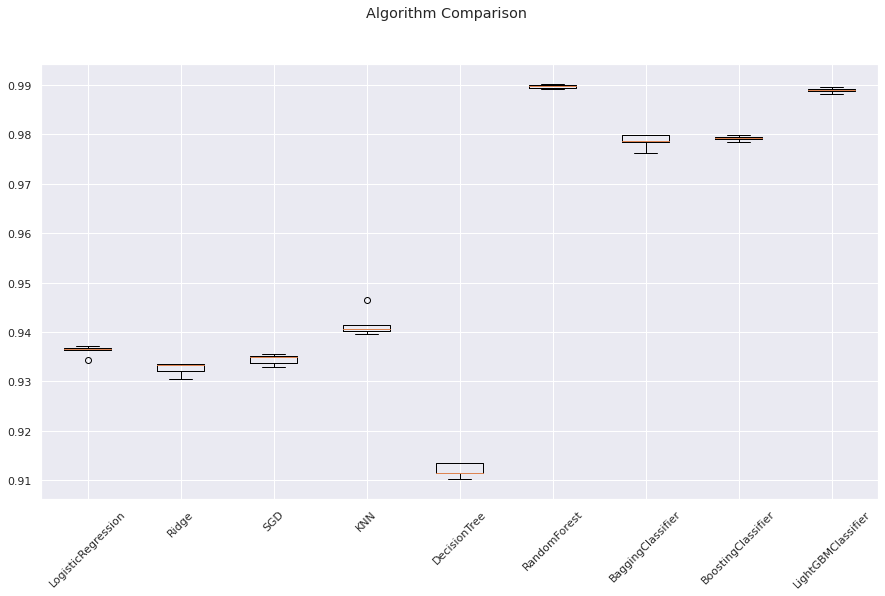

In [42]:
#Plot the results
modelObj.compareModels(results, names)

In [43]:
#Set the shortlisted Model
modelObj.getShortlistedModel()

Shortlisted model is :  {'modelName': 'RandomForest', 'model': RandomForestClassifier(), 'modelAvgCVScore': 0.9897414645351346, 'modelParams': {'n_estimators': [25, 50, 100, 150, 200], 'max_depth': [3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [42]}, 'cvResults': array([0.98976998, 0.99008653, 0.98943229, 0.99025703, 0.98916149]), 'rfeStatus': True, 'rfeModels': [], 'rfeInputFeaturesCount': [], 'RFECVResults': []}


In [44]:
#Get the List of RFE Models based on number of features and the shortlisted model

if ((modelObj.rfeStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
   
    #Get RFE Models
    modelObj.getRfeModels()
    
    #Run RFE Models and get rfeCVResults
    modelObj.shortlistedModel["RFECVResults"] = modelObj.runRFEModels(X_train, y_train)
    
    #Compare RFE Model results
    modelObj.compareModels(modelObj.shortlistedModel["RFECVResults"], list(range(modelObj.min_features, modelObj.max_features)))
    
    #Select the best performing RFE Model and number of features
    modelObj.getOptimalNumFeatures()
    
    #Get the names of selected columns by RFE
    selectColumns = modelObj.getBestFeatures(X_train, y_train)

In [45]:
#View the shortlisted Model
modelObj.shortlistedModel

{'modelName': 'RandomForest',
 'model': RandomForestClassifier(),
 'modelAvgCVScore': 0.9897414645351346,
 'modelParams': {'n_estimators': [25, 50, 100, 150, 200],
  'max_depth': [3, 5, 7, 9],
  'max_features': ['auto', 'sqrt', 'log2'],
  'random_state': [42]},
 'cvResults': array([0.98976998, 0.99008653, 0.98943229, 0.99025703, 0.98916149]),
 'rfeStatus': True,
 'rfeModels': [],
 'rfeInputFeaturesCount': [],
 'RFECVResults': []}

In [46]:
#Check if rfeCVStatus == True
if ((modelObj.rfeCVStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    selectColumns = modelObj.getBestFeaturesCV(X_train, y_train)

Summarizing the results of RFE
ColumnName: age | Selected True | Rank: 1.000
ColumnName: job | Selected True | Rank: 1.000
ColumnName: marital | Selected False | Rank: 2.000
ColumnName: education | Selected True | Rank: 1.000
ColumnName: default | Selected False | Rank: 3.000
ColumnName: housing | Selected False | Rank: 2.000
ColumnName: loan | Selected False | Rank: 3.000
ColumnName: contact | Selected False | Rank: 3.000
ColumnName: month | Selected True | Rank: 1.000
ColumnName: day_of_week | Selected True | Rank: 1.000
ColumnName: duration | Selected True | Rank: 1.000
ColumnName: campaign | Selected True | Rank: 1.000
ColumnName: pdays | Selected True | Rank: 1.000
ColumnName: previous | Selected True | Rank: 1.000
ColumnName: poutcome | Selected False | Rank: 2.000
ColumnName: emp.var.rate | Selected True | Rank: 1.000
ColumnName: cons.price.idx | Selected True | Rank: 1.000
ColumnName: cons.conf.idx | Selected True | Rank: 1.000
ColumnName: euribor3m | Selected True | Rank: 1.00

In [47]:
#If we are doing Recursive Feature Elimination
if (((modelObj.rfeStatus == True) or (modelObj.rfeCVStatus == True)) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    X_train_rfe = X_train[selectColumns]
    X_test_rfe = X_test[selectColumns]
    
else:
    X_train_rfe = X_train
    X_test_rfe = X_test

In [48]:
X_train_rfe

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.474359,0,0,0,0,0.068588,0.000000,1.000000,0.000000,1.000000,0.882307,0.376569,0.980503,1.000000
1,0.217949,0,1,1,1,0.133841,0.047619,1.000000,0.142857,0.333333,0.455183,0.669456,0.004534,0.170510
2,0.179487,1,2,0,0,0.290069,0.000000,1.000000,0.000000,1.000000,0.882307,0.376569,0.981183,1.000000
3,0.448718,0,0,2,2,0.131222,0.000000,1.000000,0.428571,0.000000,0.174591,0.866109,0.019497,0.203781
4,0.474359,2,0,3,3,0.024768,0.023810,1.000000,0.000000,0.333333,0.269680,0.192469,0.139651,0.512287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42587,0.283126,0,3,6,1,0.098891,0.016206,1.000000,0.000000,0.333333,0.603274,0.677824,0.000227,0.170510
42588,0.233126,7,0,3,4,0.086015,0.032565,1.000000,0.000000,0.877426,0.444931,0.537364,0.831349,0.910329
42589,0.101343,0,0,7,2,0.194955,0.047619,0.004362,0.350341,0.479167,0.864435,0.281533,0.069901,0.000000
42590,0.306487,0,0,5,3,0.057893,0.035155,1.000000,0.180250,0.261885,0.533713,0.542809,0.061489,0.223925


In [49]:
modelObj.shortlistedModel["model"]

RandomForestClassifier()

In [50]:
finalModel = modelObj.hyperParameterOptimization()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [51]:
#Visualize the Final Model
finalModel

RandomForestClassifier(max_depth=9, n_estimators=150, random_state=42)

In [52]:
#Fit the final Model
finalModel.fit(X_train_rfe, y_train)

RandomForestClassifier(max_depth=9, n_estimators=150, random_state=42)

In [53]:
#Predictions on Final Model
y_test_pred = finalModel.predict(X_test_rfe)

In [54]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8548228346456693


array([[4549,  775],
       [ 110,  662]])

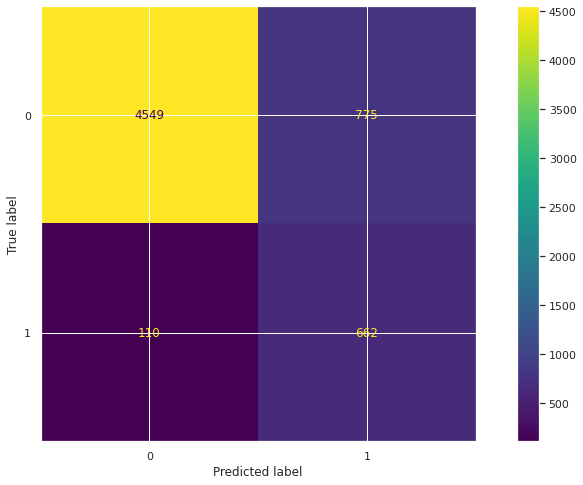

In [55]:
cm = confusion_matrix(y_test, y_test_pred, labels=finalModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=finalModel.classes_)
disp.plot()

plt.show()